* Import the used libraries

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold , train_test_split , GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# Open the data file and exploring it

In [88]:
df = pd.read_csv('Car details.csv')
df.sample(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6650,Maruti Celerio VXI,2015,350000,29000,Petrol,Individual,Manual,First Owner,23.1 kmpl,998 CC,67.04 bhp,90Nm@ 3500rpm,5.00
1713,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.00
1328,Maruti Alto K10 VXI,2019,360000,27000,Petrol,Individual,Manual,First Owner,23.95 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.00
273,Maruti Swift 1.2 DLX (Only Delhi),2014,375000,80000,Petrol,Individual,Manual,First Owner,20.4 kmpl,1197 CC,81.80 bhp,113Nm@ 4200rpm,5.00
6896,Hyundai Grand i10 1.2 CRDi Asta,2017,455000,50000,Diesel,Individual,Manual,First Owner,24.0 kmpl,1186 CC,73.97 bhp,190.24nm@ 1750-2250rpm,5.00


# Data Cleaning

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


Exploring Numerical Features

In [90]:
# Drop all categorical features
df_num = df.copy()

for i in df.columns:
    if df_num[i].dtype == "object":
        df_num.drop(i, axis=1, inplace=True)
df_num.head()

,year,selling_price,km_driven,seats
0,2014,450000,145500,5.00
1,2014,370000,120000,5.00
2,2006,158000,140000,5.00
3,2010,225000,127000,5.00
4,2007,130000,120000,5.00


Exploring Categorical Features

In [91]:
# Drop all continuous features
df_cat = df.copy()

for i in df_cat.columns:
    if df_cat[i].dtype != "object":
        df_cat.drop(i, axis=1, inplace=True)
df_cat.head()

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
0,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
1,Skoda Rapid 1.5 TDI Ambition,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm
2,Honda City 2017-2020 EXi,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)"
3,Hyundai i20 Sportz Diesel,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm
4,Maruti Swift VXI BSIII,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)"


* check if there null values

In [92]:
df.isnull().sum().sort_values(ascending=True)

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
max_power        215
mileage          221
engine           221
seats            221
torque           222
dtype: int64

* maximum number of null values in a column is 222 from 8128 entries

clean numerical columns by filling null values

In [93]:
# Fill in missing values using IterativeImputer with LinearRegression estimator
imp = IterativeImputer(estimator=LinearRegression())
imp.fit(df_num)
df = pd.DataFrame(imp.transform(df_num), columns=df_num.columns)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   float64
 1   selling_price  8128 non-null   float64
 2   km_driven      8128 non-null   float64
 3   seats          8128 non-null   float64
dtypes: float64(4)
memory usage: 254.1 KB


In [95]:
df.shape

(8128, 4)

In [96]:
df.sample(5)

,year,selling_price,km_driven,seats
2188,"2,012.00","120,000.00","160,000.00",5.76
7998,"2,017.00","270,000.00","35,000.00",5.00
854,"2,017.00","625,000.00","43,000.00",5.00
4111,"2,014.00","235,000.00","25,000.00",5.00
6197,"2,011.00","325,000.00","162,000.00",8.00


In [97]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,"8,128.00","2,013.80",4.04,"1,983.00","2,011.00","2,015.00","2,017.00","2,020.00"
selling_price,"8,128.00","638,271.81","806,253.40","29,999.00","254,999.00","450,000.00","675,000.00","10,000,000.00"
km_driven,"8,128.00","69,819.51","56,550.55",1.00,"35,000.00","60,000.00","98,000.00","2,360,457.00"
seats,"8,128.00",5.42,0.95,2.00,5.00,5.00,5.00,14.00


# Clean Categorical Variables
* Clean the features
* Fill in missing values
* Create new features
* Create a new dataframe
* Converting dtype

In [98]:
# Clean the engine feature
df_cat["engine"] =df_cat["engine"].str.replace(" CC", "")

In [99]:
# Clean the mileage feature
df_cat["mileage"] = df_cat["mileage"].str.replace(" kmpl", "").str.replace(" km/kg", "")

In [100]:
# Clean the max_power feature
df_cat.loc[4933, "max_power"] = np.nan
df_cat["max_power"] = df_cat["max_power"].str.replace(" bhp", "")

In [101]:
# Clean the torque feature
df_cat["torque"] = df_cat["torque"].str.replace(",", "").str.replace(" ", "").str.replace("   ", "").str.replace("rpm", "").str.replace("RPM", "").str.replace("kgm@", "").str.replace("(", "").str.replace(")", "").str.replace("480Nm", "1750").str.replace("400Nm", "4000").replace("48@3000+/-500NM@", "3000").replace("51Nm@4000+/-500", "4000")
df_cat["torque"] = df_cat["torque"].astype("str").apply(lambda x: x[-4:])

for i in df_cat.loc[df_cat["torque"] == "nan"].index:
    df_cat.loc[i, "torque"] = np.nan

Fill Missing

In [102]:
# Fill in missing values using IterativeImputer with RandomForestRegressor estimator
col = ["mileage", "engine", "max_power", "torque"]
X = df_cat[col]

imp = IterativeImputer(estimator=LinearRegression())
imp.fit(X)
df = pd.concat([df, pd.DataFrame(imp.transform(X), columns=X.columns)], axis=1)

 Create a brand feature by parsing name

In [103]:
# Create a brand feature by parsing name
names = ["Land Rover", "Swift Dzire", "Wagon R", "Vitara Brezza", "Alto 800", "Alto K10", "Zen Estilo", "KUV 100", "TUV 300", "Renault Logan", "Ssangyong Rexton", "Innova Crysta", "Etios Liva", "Corolla Altis", "B Class", "New C-Class", "3 Series", "5 Series", "7 Series", "X4 M", "Indica Vista", "New Safari", "Santro Xing", "Grand i10", "Elite i20", "Figo Aspire", "Fiesta Classic", "Grande Punto", "Tavera Neo", "Sail Hatchback", "GO Plus"]

for i in df_cat["name"]:
    for j in names:
        if j in i:
            df_cat["name"] = df_cat["name"].str.replace(j, j.replace(" ","-"))

df_cat.insert(0, "brand", df_cat["name"].apply(lambda x: x.split(" ")[0]))

In [104]:
# Create a model feature by parsing name
df_cat.insert(1, "model", df_cat["name"].apply(lambda x: x.split(" ")[1]))

In [105]:
# Create a variant feature by parsing name
df_cat.insert(2, "variant", df_cat["name"].apply(lambda x: x.split(" ")[2:]).apply(lambda x: " ".join(x)))

In [106]:
# Combine continuous variables & categorical variables into new dataframe
df = pd.concat([df_cat.iloc[:, :3],df_cat.iloc[:, 4:8],df], axis=1)

In [107]:
#df = pd.concat([df_cat.iloc[:, :3], df_cat.iloc[:, 4:8], car, df_num], axis=1)


In [108]:
df.head()

,brand,model,variant,fuel,seller_type,transmission,owner,year,selling_price,km_driven,seats,mileage,engine,max_power,torque
0,Maruti,Swift-Dzire,VDI,Diesel,Individual,Manual,First Owner,"2,014.00","450,000.00","145,500.00",5.00,23.40,"1,248.00",74.00,"2,000.00"
1,Skoda,Rapid,1.5 TDI Ambition,Diesel,Individual,Manual,Second Owner,"2,014.00","370,000.00","120,000.00",5.00,21.14,"1,498.00",103.52,"2,500.00"
2,Honda,City,2017-2020 EXi,Petrol,Individual,Manual,Third Owner,"2,006.00","158,000.00","140,000.00",5.00,17.70,"1,497.00",78.00,"2,700.00"
3,Hyundai,i20,Sportz Diesel,Diesel,Individual,Manual,First Owner,"2,010.00","225,000.00","127,000.00",5.00,23.00,"1,396.00",90.00,"2,750.00"
4,Maruti,Swift,VXI BSIII,Petrol,Individual,Manual,First Owner,"2,007.00","130,000.00","120,000.00",5.00,16.10,"1,298.00",88.20,"4,500.00"


In [109]:
df.shape

(8128, 15)

In [110]:
#df = df.drop(['name'] ,axis=1)

In [111]:
# Converting dtype to 'int64'
int_list = ["year", "selling_price", "km_driven", "seats", "engine", "torque"]

for i in int_list:
    df[i] = df[i].astype("int64")

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8128 non-null   object 
 1   model          8128 non-null   object 
 2   variant        8128 non-null   object 
 3   fuel           8128 non-null   object 
 4   seller_type    8128 non-null   object 
 5   transmission   8128 non-null   object 
 6   owner          8128 non-null   object 
 7   year           8128 non-null   int64  
 8   selling_price  8128 non-null   int64  
 9   km_driven      8128 non-null   int64  
 10  seats          8128 non-null   int64  
 11  mileage        8128 non-null   float64
 12  engine         8128 non-null   int64  
 13  max_power      8128 non-null   float64
 14  torque         8128 non-null   int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 952.6+ KB


In [113]:
df.sample(5)

,brand,model,variant,fuel,seller_type,transmission,owner,year,selling_price,km_driven,seats,mileage,engine,max_power,torque
3692,Hyundai,Xcent,1.2 Kappa SX Option,Petrol,Individual,Manual,First Owner,2017,610000,14000,5,19.10,1197,82.00,4000
5969,Maruti,Swift,VDI Optional,Diesel,Individual,Manual,First Owner,2016,590000,120000,5,25.20,1248,74.00,2000
7204,Maruti,Wagon-R,LXI BS IV,Petrol,Individual,Manual,Second Owner,2011,210000,90000,5,18.90,998,67.10,3500
2831,Honda,Amaze,S Diesel,Diesel,Dealer,Manual,Second Owner,2013,325000,60000,5,24.70,1498,98.63,1750
6886,Maruti,Celerio,ZXI Optional,Petrol,Individual,Manual,First Owner,2017,483000,15000,5,23.10,998,67.04,3500


# Univariate & Bivariate Analysis

### Which is the best selling car brand?

c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


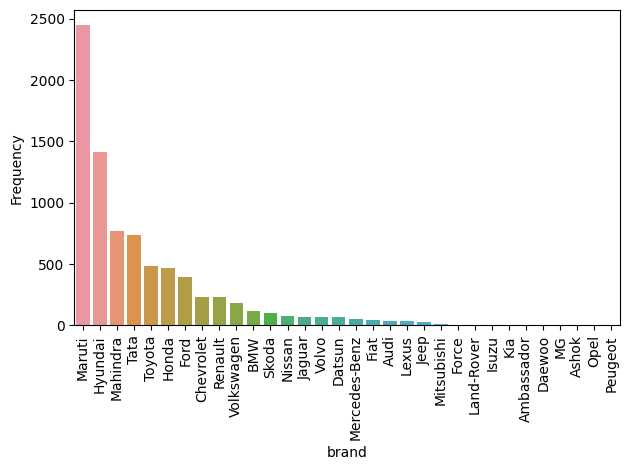

In [114]:
# detect the most selling brand
sns.countplot(
    data=df,
    x="brand",
    order=df["brand"].value_counts().index
)
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()

we find that Maruti is the most selling brand

### Which brand sells the most expensive cars?

c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


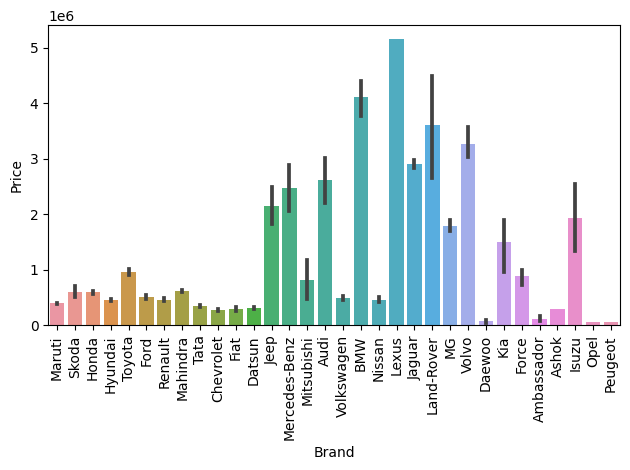

In [115]:
sns.barplot(
    data=df,
    x="brand",
    y="selling_price"
)
plt.xticks(rotation=90)
plt.xlabel('Brand')
plt.ylabel('Price')
plt.tight_layout()

lexus the most expensive sells

### What model year of car has sold the most?

c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


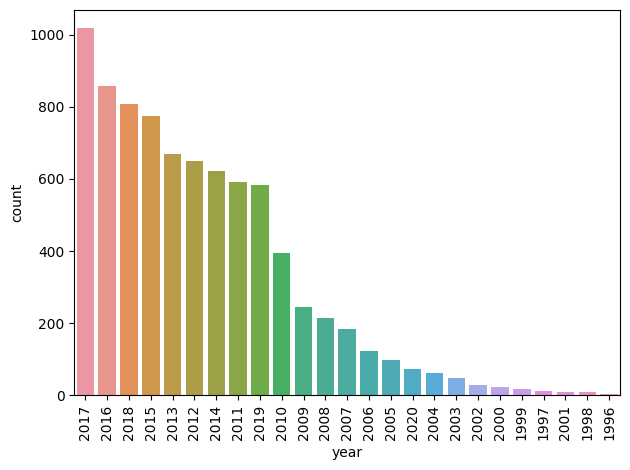

In [116]:
sns.countplot(
    data=df,
    x="year",
    order=df['year'].value_counts()[:25].index
)
plt.xticks(rotation=90)
plt.tight_layout()

 we detect that the recently models are most saled

### whick mototr fuel type is the most used?

c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


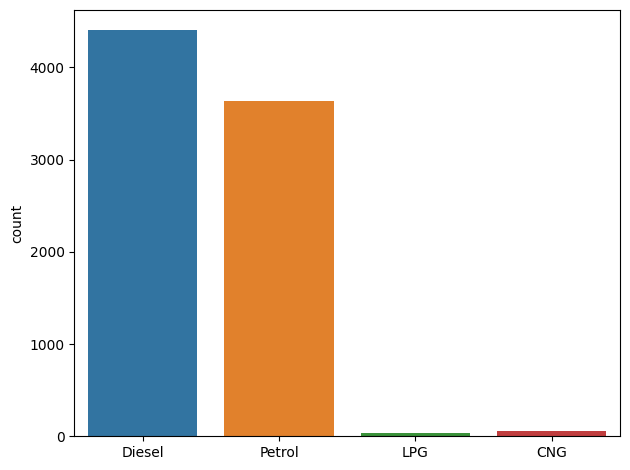

In [117]:
sns.countplot(
    data=df ,
    x='fuel'        
                ).set(xlabel=None)
plt.tight_layout()

we detect that Diesel is the mostly used

### What is the most expensive used fuel?

c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


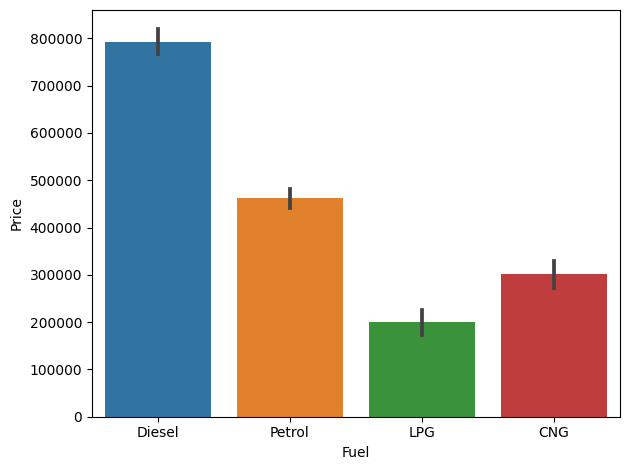

In [118]:
sns.barplot(
    data=df,
    x="fuel",
    y="selling_price"
)
plt.ylabel('Price')
plt.xlabel('Fuel')
plt.tight_layout()

Diesel cars are the most expensive

### how are the Fuels type with seller type?

c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

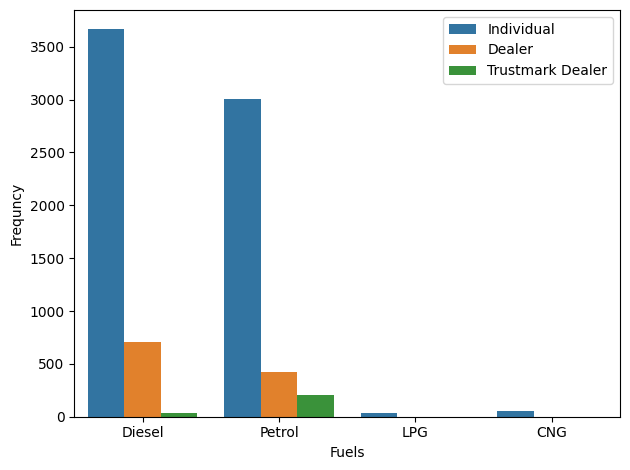

In [119]:
sns.countplot(
data=df ,
x='fuel' , 
hue='seller_type'
)
plt.legend(loc="upper right")
plt.xlabel('Fuels')
plt.ylabel('Frequncy')
plt.tight_layout()

### How fuel is related with seller type?

c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

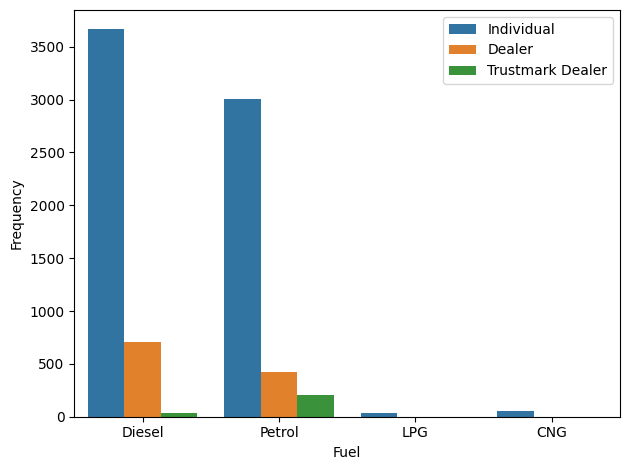

In [120]:
sns.countplot(
    data=df,
    x="fuel",
    hue="seller_type"
)
plt.legend(loc="upper right")
plt.xlabel('Fuel')
plt.ylabel('Frequency')
plt.tight_layout()

### How transimition is related with seller type?

c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

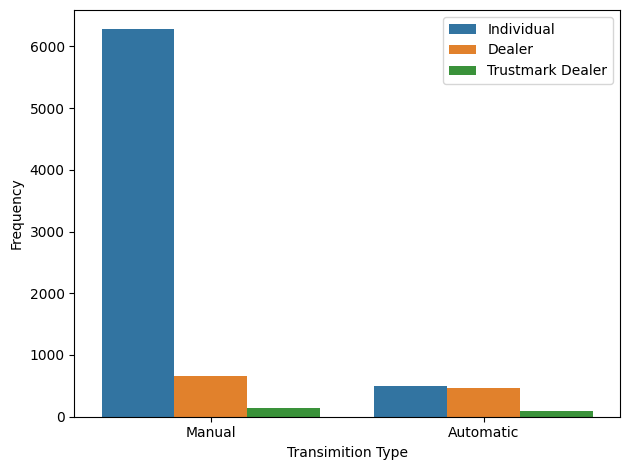

In [121]:
sns.countplot(
data=df ,
x='transmission' ,
hue='seller_type'
)
plt.legend(loc="upper right")
plt.xlabel('Transimition Type')
plt.ylabel('Frequency')
plt.tight_layout()

### How fuel is related with km driven?

c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


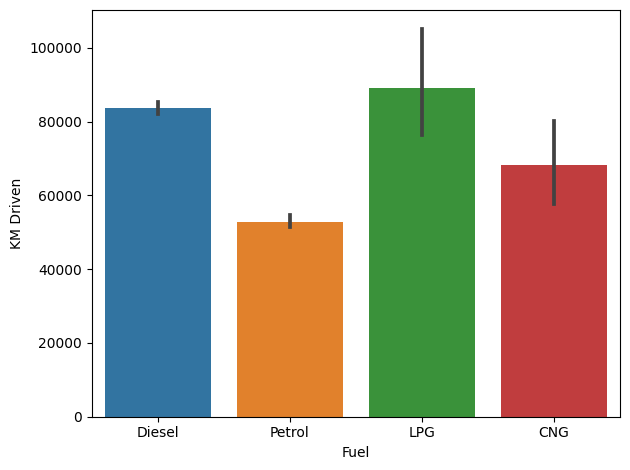

In [122]:
sns.barplot(
    data=df,
    x="fuel",
    y="km_driven"
)
plt.xlabel('Fuel')
plt.ylabel('KM Driven')
plt.tight_layout()

### How fuel is related with torque?

c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


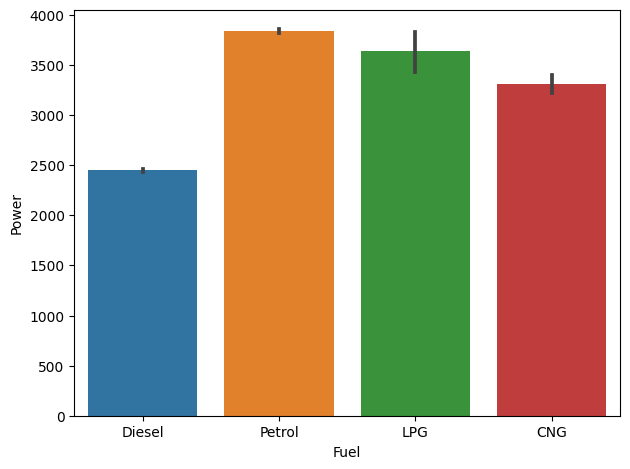

In [123]:
sns.barplot(
    data=df,
    x="fuel",
    y="torque"
)
plt.xlabel('Fuel')
plt.ylabel('Power')
plt.tight_layout()

### Which seller type is mostly preferred?

c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


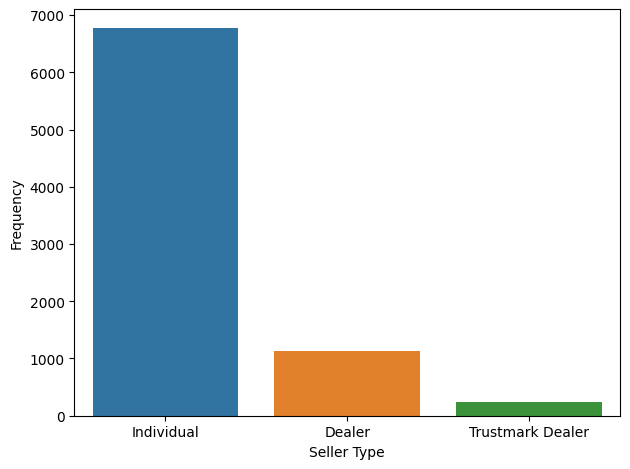

In [124]:
sns.countplot(
    data=df,
    x="seller_type"
)
plt.xlabel('Seller Type')
plt.ylabel('Frequency')
plt.tight_layout()

### How seller type is related with transmission?

c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

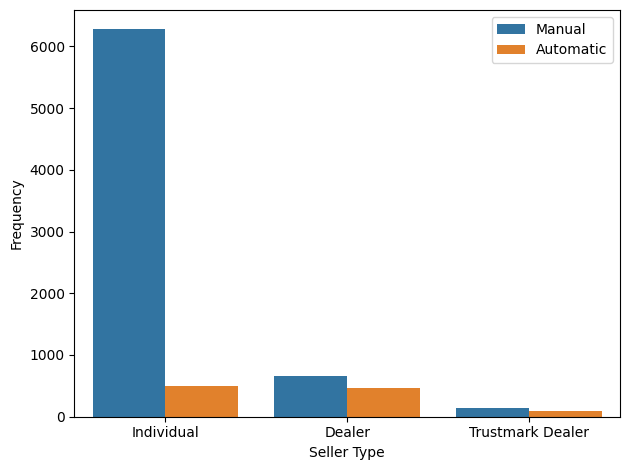

In [125]:
sns.countplot(
    data=df,
    x="seller_type",
    hue="transmission"
)
plt.legend(loc="upper right")
plt.xlabel('Seller Type')
plt.ylabel('Frequency')
plt.tight_layout()

### Which transmission is mostly preferred?

c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


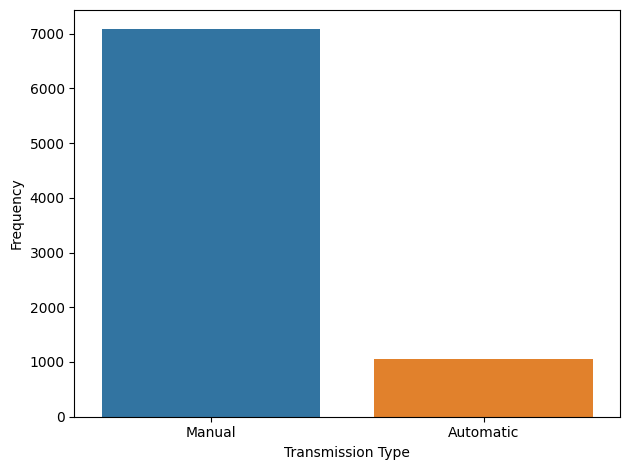

In [126]:
sns.countplot(
    data=df,
    x="transmission"
)
plt.xlabel('Transmission Type')
plt.ylabel('Frequency')
plt.tight_layout()

### How transmission is related with selling price?

c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


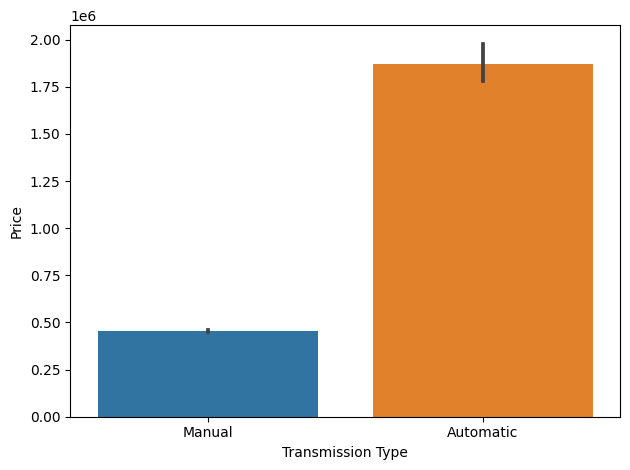

In [127]:
sns.barplot(
    data=df,
    x="transmission",
    y="selling_price"
)
plt.xlabel('Transmission Type')
plt.ylabel('Price')
plt.tight_layout()

* في افكار كتير تاني بس مكسل اكمل الصراحه

# Data Preparation

* detecting and removing outliers

c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pc\AppData\Local\Temp\ipykernel_11528\1779141550.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mo

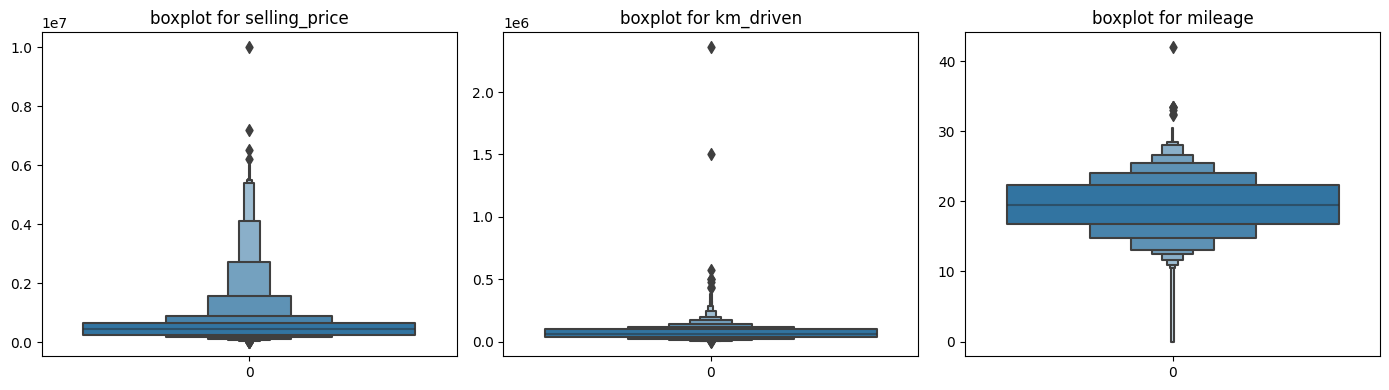

In [128]:
col = 1

plt.figure(figsize=(14, 4))

for feature in ["selling_price","km_driven", "mileage", "max_power"]:
    if col < 4:
        plt.subplot(1, 3, col)
        sns.boxenplot(
            df[feature],
    
            
        ).set(xlabel=None)
        plt.title("boxplot for %s" % (feature))
    col += 1
    plt.tight_layout()

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8128 non-null   object 
 1   model          8128 non-null   object 
 2   variant        8128 non-null   object 
 3   fuel           8128 non-null   object 
 4   seller_type    8128 non-null   object 
 5   transmission   8128 non-null   object 
 6   owner          8128 non-null   object 
 7   year           8128 non-null   int64  
 8   selling_price  8128 non-null   int64  
 9   km_driven      8128 non-null   int64  
 10  seats          8128 non-null   int64  
 11  mileage        8128 non-null   float64
 12  engine         8128 non-null   int64  
 13  max_power      8128 non-null   float64
 14  torque         8128 non-null   int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 952.6+ KB


In [130]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,"8,128.00","2,013.80",4.04,"1,983.00","2,011.00","2,015.00","2,017.00","2,020.00"
selling_price,"8,128.00","638,271.81","806,253.40","29,999.00","254,999.00","450,000.00","675,000.00","10,000,000.00"
km_driven,"8,128.00","69,819.51","56,550.55",1.00,"35,000.00","60,000.00","98,000.00","2,360,457.00"
seats,"8,128.00",5.40,0.95,2.00,5.00,5.00,5.00,14.00
mileage,"8,128.00",19.42,3.98,0.00,16.80,19.42,22.30,42.00
engine,"8,128.00","1,457.91",497.63,549.00,"1,197.00","1,248.00","1,582.00","3,604.00"
max_power,"8,128.00",91.51,35.35,0.00,68.10,83.10,101.25,400.00
torque,"8,128.00","3,082.66",892.89,"1,400.00","2,500.00","3,000.00","4,000.00","5,300.00"


In [131]:
df.sample(10)

,brand,model,variant,fuel,seller_type,transmission,owner,year,selling_price,km_driven,seats,mileage,engine,max_power,torque
4149,Maruti,SX4,Vxi BSIII,Petrol,Individual,Manual,First Owner,2009,150000,110000,5,15.00,1586,104.68,4100
2286,Maruti,Alto,LX,Petrol,Individual,Manual,Second Owner,2006,120000,30000,5,19.70,796,46.30,3000
1437,Honda,City,V MT,Petrol,Dealer,Manual,First Owner,2013,480000,42462,5,16.80,1497,116.30,4800
2904,Hyundai,i20,Magna 1.4 CRDi (Diesel),Diesel,Individual,Manual,Second Owner,2013,390000,53000,5,21.90,1396,88.76,2750
7705,Toyota,Camry,2.5 Hybrid,Petrol,Trustmark Dealer,Automatic,First Owner,2016,2000000,68089,5,19.16,2494,157.70,4500
7736,Tata,Safari,DICOR 2.2 LX 4x2,Diesel,Dealer,Manual,First Owner,2012,132000,82507,7,13.93,2179,138.03,2700
3218,Maruti,Alto-800,LXI,Petrol,Individual,Manual,First Owner,2020,350000,5000,5,22.05,796,47.30,3500
2302,Hyundai,EON,Era Plus,Petrol,Individual,Manual,First Owner,2016,250000,110000,5,21.10,814,55.20,4000
1461,Mahindra,XUV500,W7,Diesel,Individual,Manual,First Owner,2020,830000,120000,7,15.10,2179,152.87,2800
7757,BMW,5-Series,520d Luxury Line,Diesel,Dealer,Automatic,First Owner,2019,5200000,10000,5,18.12,1995,190.00,2500


In [132]:
def detect_outlier(feature):
    outliers = []
    data = df[feature]
    mean = np.mean(data)
    std = np.std(data)

    for y in data:
        z_score = (y-mean) / std 
        if np.abs(z_score) > 3:
            outliers.append(y)
    print("\nOutlier caps for %s:" % (feature))
    print("  -95p: %.1f / %s values exceed that" % (data.quantile(.95), len([i for i in data if i > data.quantile(.95)])))
    print("  -3sd: %.1f / %s values exceed that" % (mean + 3*(std), len(outliers)))
    print("  -99p: %.1f / %s values exceed that" % (data.quantile(.99), len([i for i in data if i > data.quantile(.99)])))

In [133]:
# numerical columns
#cols = df[['selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque']]
#plt.figure(figsize=(20,8))
#for i , e in enumerate(cols[0:]):
 #       plt.subplot(0, 1, e+1)
  #      sns.histplot(cols[i], kde=True)
   #     plt.title('Distribution of ' + i)
    #    plt.tight_layout()
     #   plt.ylabel('Frequency')

In [134]:
# Determine what the upperbound should be for continuous features
for feat in ["km_driven",'mileage' ,"max_power","selling_price"]:
   detect_outlier(feat)


Outlier caps for km_driven:


  -95p: 150000.0 / 392 values exceed that
  -3sd: 239460.7 / 72 values exceed that
  -99p: 225000.0 / 80 values exceed that

Outlier caps for mileage:
  -95p: 25.8 / 377 values exceed that
  -3sd: 31.4 / 24 values exceed that
  -99p: 28.4 / 9 values exceed that

Outlier caps for max_power:
  -95p: 171.5 / 390 values exceed that
  -3sd: 197.5 / 94 values exceed that
  -99p: 204.0 / 80 values exceed that

Outlier caps for selling_price:
  -95p: 1950000.0 / 403 values exceed that
  -3sd: 3056883.2 / 229 values exceed that
  -99p: 5200000.0 / 79 values exceed that


In [135]:
# Cap features
df["km_driven"].clip(upper=df["km_driven"].quantile(.99), inplace=True)
df["mileage"].clip(upper=df["mileage"].quantile(.99), inplace=True)
df["max_power"].clip(upper=df["max_power"].quantile(.99), inplace=True)
df["selling_price"].clip(upper=df["selling_price"].quantile(.99) , inplace=True)

In [136]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,"8,128.00","2,013.80",4.04,"1,983.00","2,011.00","2,015.00","2,017.00","2,020.00"
selling_price,"8,128.00","634,128.23","779,268.55","29,999.00","254,999.00","450,000.00","675,000.00","5,200,000.00"
km_driven,"8,128.00","68,781.68","45,035.52",1.00,"35,000.00","60,000.00","98,000.00","225,000.00"
seats,"8,128.00",5.40,0.95,2.00,5.00,5.00,5.00,14.00
mileage,"8,128.00",19.42,3.97,0.00,16.80,19.42,22.30,28.40
engine,"8,128.00","1,457.91",497.63,549.00,"1,197.00","1,248.00","1,582.00","3,604.00"
max_power,"8,128.00",91.17,33.92,0.00,68.10,83.10,101.25,204.00
torque,"8,128.00","3,082.66",892.89,"1,400.00","2,500.00","3,000.00","4,000.00","5,300.00"


c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

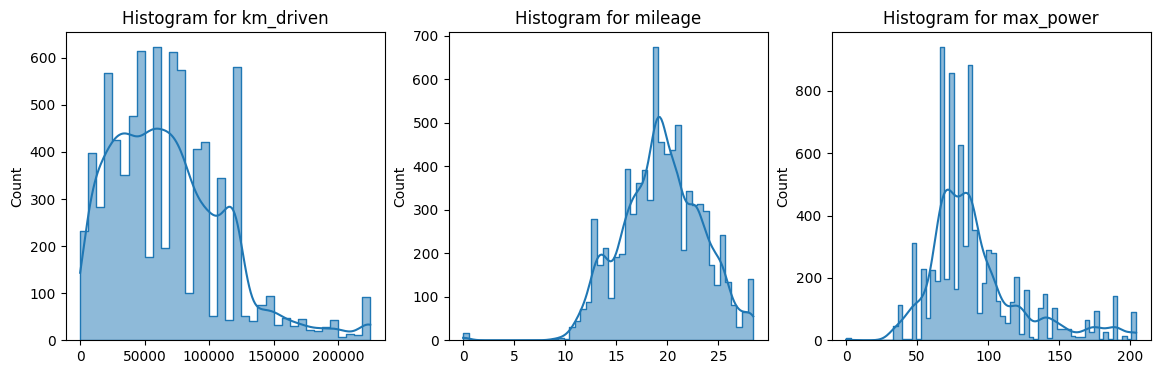

In [137]:
# Plot histogram for each continuous feature to see if a transformation is necessary
col = 1

plt.figure(figsize=(14, 4))

for feature in ["km_driven", "mileage", "max_power","selling_price"]:
    if col < 4:
        plt.subplot(1, 3, col)
        sns.histplot(
            df[feature],
            element="step",
            kde=True
        ).set(xlabel=None)
        plt.title("Histogram for %s" % (feature))
    col += 1

c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


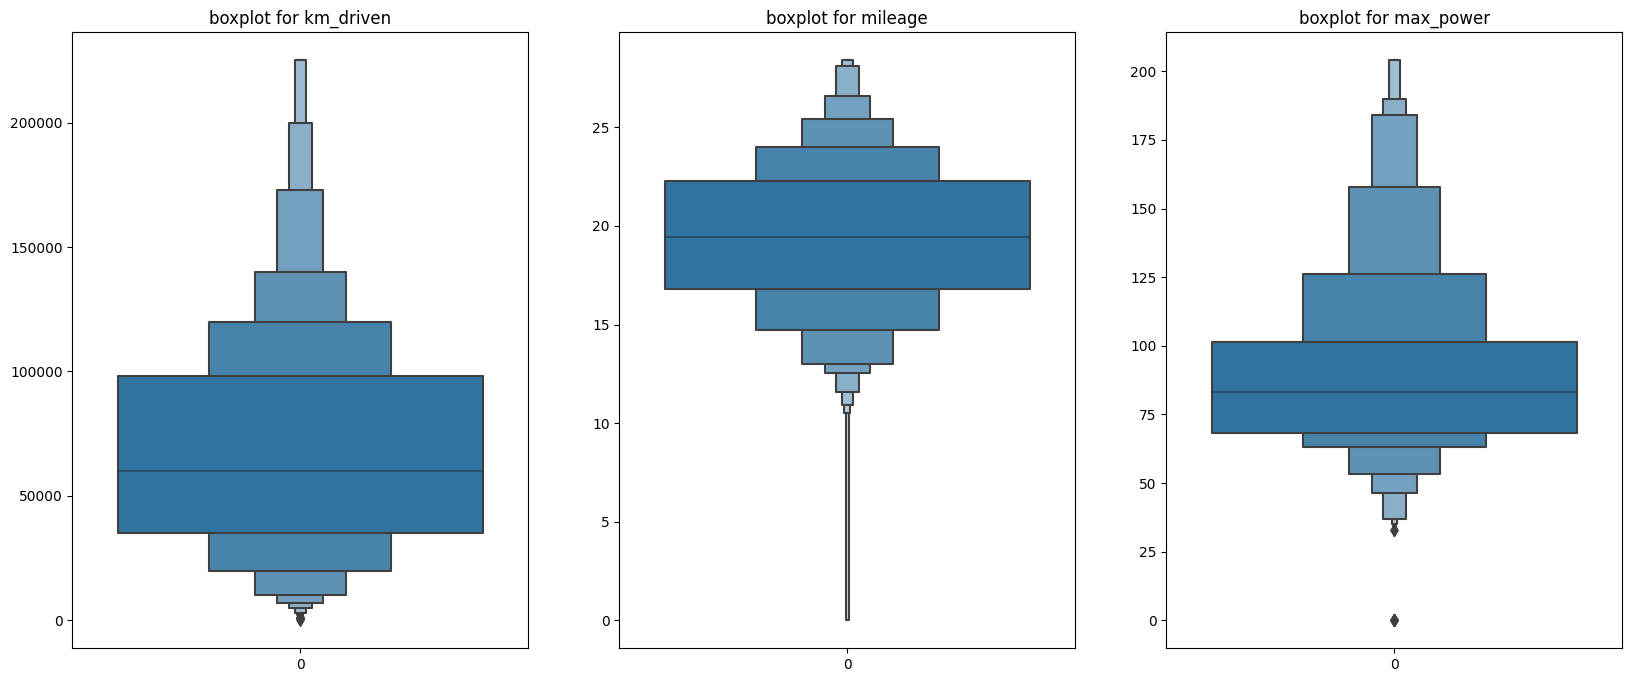

In [138]:
col = 1

plt.figure(figsize=(20, 8))

for feature in ["km_driven", "mileage", "max_power","selling_price"]:
    if col < 4:
        plt.subplot(1, 3, col)
        sns.boxenplot(
            df[feature],
    
            
        ).set(xlabel=None)
        plt.title("boxplot for %s" % (feature))
    col += 1

Convert Categorical Features To Numeric

In [139]:
from category_encoders import TargetEncoder
# Convert categorical features to numeric levels
for f in df.columns:
    if df[f].dtype == "object":
        target_encoder = TargetEncoder()
        df[f] = target_encoder.fit_transform(df[f], df["selling_price"])

In [140]:
df.head(10)

,brand,model,variant,fuel,seller_type,transmission,owner,year,selling_price,km_driven,seats,mileage,engine,max_power,torque
0,"403,075.72","512,518.47","536,322.13","785,589.68","497,236.96","455,425.86","777,298.93",2014,450000,145500,5,23.40,1248,74.00,2000
1,"607,729.14","596,754.45","619,588.69","785,589.68","497,236.96","455,425.86","392,964.47",2014,370000,120000,5,21.14,1498,103.52,2500
2,"596,178.01","570,062.26","533,687.97","460,273.89","497,236.96","455,425.86","284,015.33",2006,158000,140000,5,17.70,1497,78.00,2700
3,"458,554.37","520,630.47","580,897.18","785,589.68","497,236.96","455,425.86","777,298.93",2010,225000,127000,5,23.00,1396,90.00,2750
4,"403,075.72","456,304.40","525,459.35","460,273.89","497,236.96","455,425.86","777,298.93",2007,130000,120000,5,16.10,1298,88.20,4500
5,"458,554.37","493,431.78","610,846.47","460,273.89","497,236.96","455,425.86","777,298.93",2017,440000,45000,5,20.14,1197,81.86,4000
6,"403,075.72","261,877.09","536,019.04","261,942.88","497,236.96","455,425.86","777,298.93",2007,96000,175000,5,17.30,1061,57.50,4500
7,"403,075.72","68,798.03","557,477.65","460,273.89","497,236.96","455,425.86","392,964.47",2001,45000,5000,4,16.10,796,37.00,2500
8,"959,946.67","488,720.23","593,329.54","785,589.68","497,236.96","455,425.86","777,298.93",2011,350000,90000,5,23.59,1364,67.10,2400
9,"516,682.58","308,928.45","532,299.36","785,589.68","497,236.96","455,425.86","777,298.93",2013,200000,169000,5,20.00,1399,68.10,2000


# Data Preprocessing and Models Implementation

split the data into train , validation , and test set

In [141]:
from sklearn.model_selection import KFold , train_test_split
X = df.drop(["selling_price"], axis=1)
y = df["selling_price"]
kf = KFold(n_splits=5)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    X_val, X_test, y_val, y_test = train_test_split(X_test,y_test, test_size=0.5, random_state=42)

Standardize the Features

In [142]:
# Fit the scaler on the training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [143]:
# Scale the training, test and validation sets
features = X_train.columns
X_train[features] = scaler.transform(X_train)
X_val[features] = scaler.transform(X_val)
X_test[features] = scaler.transform(X_test)

C:\Users\pc\AppData\Local\Temp\ipykernel_11528\177256264.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[features] = scaler.transform(X_train)


In [144]:
X_train[features].head()

,brand,model,variant,fuel,seller_type,transmission,owner,year,km_driven,seats,mileage,engine,max_power,torque
0,-0.35,-0.14,-0.20,0.92,-0.43,-0.39,0.72,0.05,1.72,-0.43,1.01,-0.42,-0.50,-1.22
1,-0.03,-0.00,-0.05,0.92,-0.43,-0.39,-1.19,0.05,1.15,-0.43,0.44,0.08,0.36,-0.66
2,-0.05,-0.05,-0.21,-1.04,-0.43,-0.39,-1.73,-1.93,1.59,-0.43,-0.43,0.08,-0.39,-0.44
3,-0.27,-0.13,-0.12,0.92,-0.43,-0.39,0.72,-0.94,1.30,-0.43,0.91,-0.12,-0.03,-0.38
4,-0.35,-0.23,-0.22,-1.04,-0.43,-0.39,0.72,-1.68,1.15,-0.43,-0.83,-0.32,-0.09,1.58


<Axes: >

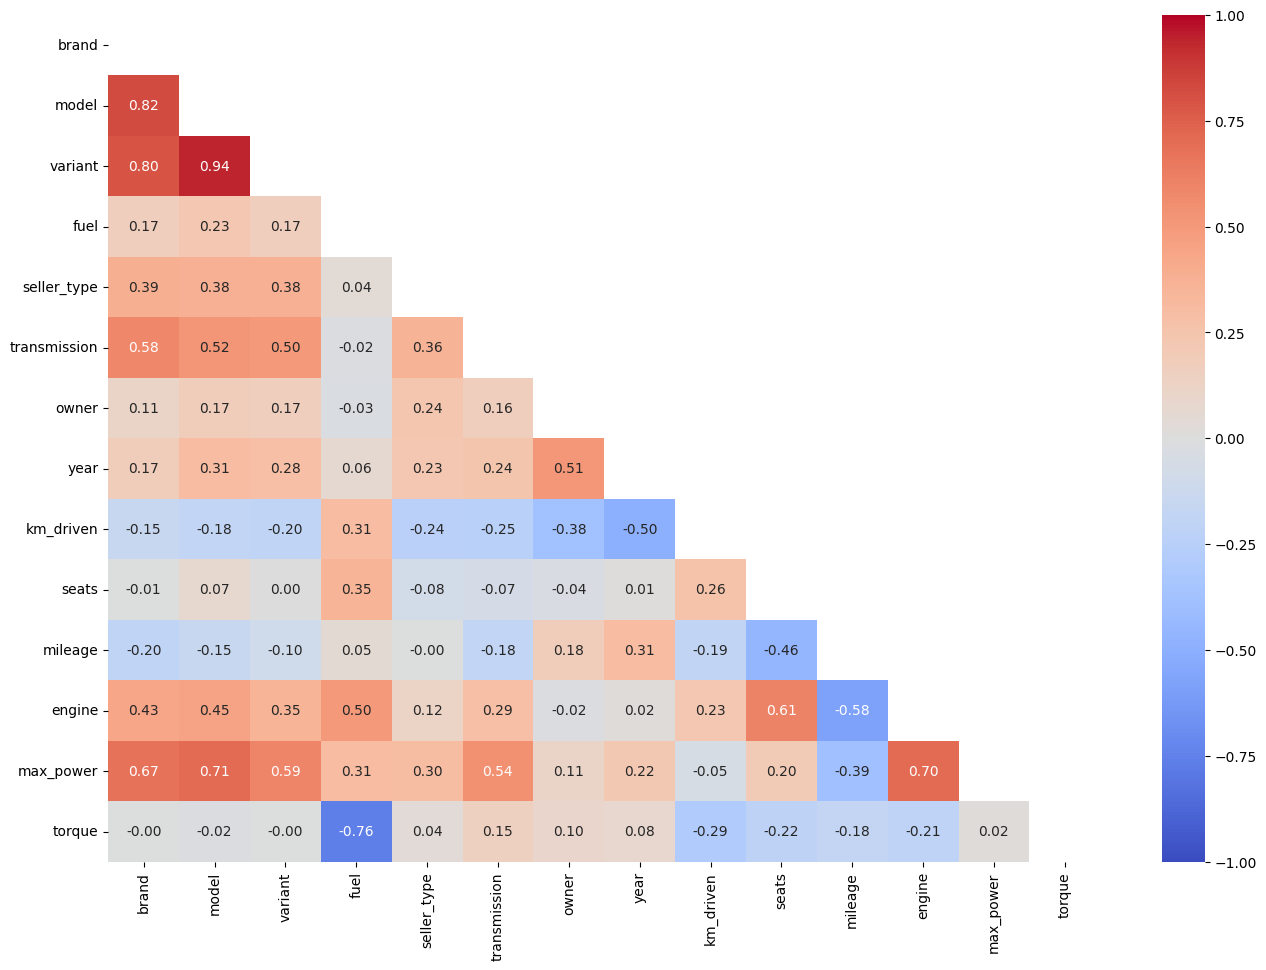

In [145]:
matrix = np.triu(X_train[features].corr())

plt.figure(figsize=(16, 11))

sns.heatmap(
    X_train[features].corr(),
    vmin=-1,
    vmax=1,
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f",
    mask=matrix
)

Target variable (selling_price) is correlated with model, variant and max_power features. So, I drop them for model implementation.

### Split Into Train, Validation and Test Set

In [146]:
# Drop unnecccessary features and split into training/test sets
X = df.drop(["selling_price", "model", "variant", "max_power"], axis=1)
y = df["selling_price"]
kf = KFold(n_splits=5)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    X_val, X_test, y_val, y_test = train_test_split(X_test,y_test,test_size=0.5,random_state=42)

### Standardize Features

In [147]:
# Fit the scaler on the training data
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [148]:
# Scale the training, test and validation sets
features = X_train.columns
X_train[features] = scaler.transform(X_train)
X_val[features] = scaler.transform(X_val)
X_test[features] = scaler.transform(X_test)

C:\Users\pc\AppData\Local\Temp\ipykernel_11528\177256264.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[features] = scaler.transform(X_train)


## Linear Regression Technique

In [149]:
# Conduct search for best params while running cross-validation (GridSearchCV)
#parameters = {
   # "fit_intercept": [True, False],
    #"positive": [True, False]
#}

#lr_cv = GridSearchCV(LinearRegression(), parameters, cv=5)
#lr_cv.fit(X_train[features], y_train.values)

#lr = lr_cv.best_estimator_
#lr_cv.fit(X_train[features], y_train.values)

#best_params = lr_cv.best_params_
#best_score = lr_cv.best_score_

#print("Best Parameters:", best_params)
#print("Best Score:", best_score)

In [150]:
lr = LinearRegression()
lr.fit(X_train[features] , y_train.values)

LinearRegression()

In [151]:


# Predict on a new set or the validation set (X_val)
y_pred = lr.predict(X_val[features])
y_pred

array([ 3.93217105e+05,  4.92067016e+05,  1.00976592e+06,  2.52097095e+06,
        3.33885972e+05,  4.21889115e+05,  3.56953712e+05,  9.98107082e+03,
        4.64810113e+05,  7.23623538e+05,  6.73752378e+05,  6.27156399e+05,
       -2.36664165e+04,  3.37954147e+06,  4.67912106e+05,  4.35978365e+06,
        2.94343819e+05,  4.68569255e+05,  1.04824734e+06,  6.64716736e+05,
        9.04604623e+05,  4.69380937e+05,  5.11012539e+05,  3.70808152e+05,
        2.07980034e+05,  5.78293893e+05,  5.79150417e+05,  8.62749660e+05,
        3.91713898e+05,  6.74929347e+05,  5.55987738e+05,  6.76569035e+05,
        7.74947690e+05,  8.76129544e+05,  2.28189732e+05,  1.44083717e+05,
        3.06959051e+05,  7.98699958e+05,  2.34466560e+05,  5.30443870e+05,
        7.09986426e+05,  6.87342968e+05,  7.79004321e+05,  4.55044774e+05,
       -2.17098520e+04,  5.84557071e+05,  5.98490345e+05,  7.03675285e+05,
        4.42683005e+05,  4.46620974e+05,  4.76390043e+05,  3.29949792e+06,
        8.34419719e+05,  

In [152]:
# Calculate the score for training data
train_score = lr.score(X_train[features], y_train.values)
test_score = lr.score(X_test[features], y_test.values)
print(f'Training score: {train_score}, Testing score: {test_score}')

Training score: 0.8248603949504367, Testing score: 0.8173415139261601


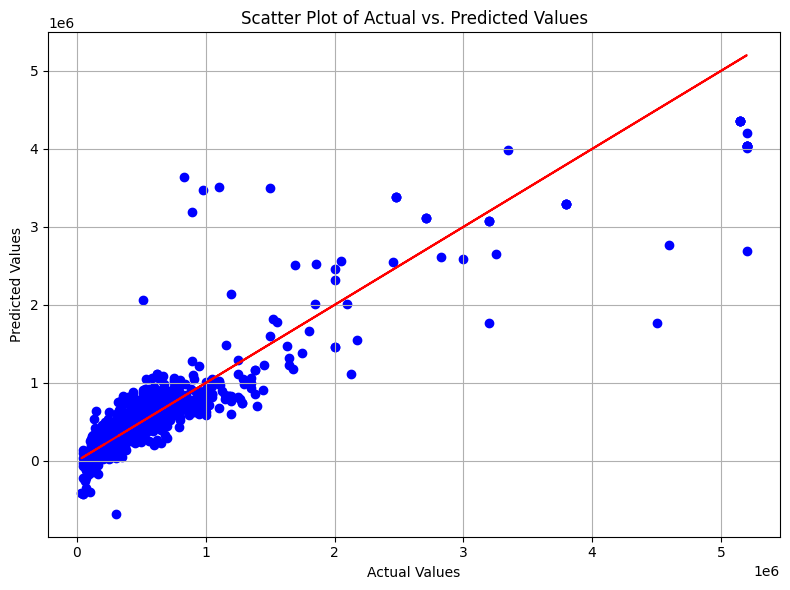

In [153]:
# plotting the performance of the model
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred, color='blue')  # Actual vs. Predicted values
plt.plot(y_val, y_val, color='red')  # Diagonal line indicating perfect predictions
plt.title('Scatter Plot of Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.tight_layout()
plt.show()


In [154]:
mae = mean_absolute_error(y_val , y_pred)
mse = mean_squared_error(y_val , y_pred)
rmse = np.sqrt(mean_squared_error(y_val , y_pred))
r_squared = r2_score(y_val , y_pred)
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {mse:.4f}')
print(f'R-squared (R²) score: {r_squared:.4f}')

Mean Absolute Error (MAE): 196795.9227
Mean Squared Error (MSE): 124595019507.0392
Root Mean Squared Error (RMSE): 124595019507.0392
R-squared (R²) score: 0.8157


## KNeighbors-Regressor Technique

In [155]:
parameters = {
    "n_neighbors": range(2, 21),
    "weights": ["uniform", "distance"],
    "algorithm": ["ball_tree", "kd_tree", "brute"],
    "metric": ["minkowski", "euclidean", "manhattan"]
}

knn_cv = GridSearchCV(KNeighborsRegressor(), parameters, cv=5)
knn_cv.fit(X_train[features], y_train.values)


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': range(2, 21),
                         'weights': ['uniform', 'distance']})

In [156]:
best_params = knn_cv.best_params_
best_score = knn_cv.best_score_
best_estimator = knn_cv.best_estimator_
print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("Best Estimator:", best_estimator)

Best Parameters: {'algorithm': 'brute', 'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}
Best Score: 0.9523781552866419
Best Estimator: KNeighborsRegressor(algorithm='brute', metric='manhattan', n_neighbors=10,
                    weights='distance')


In [157]:
# Calculate the score for training data
train_score = knn_cv.score(X_train[features], y_train.values)
print(f'Training score: {train_score} ,Testing score: {knn_cv.score(X_test[features], y_test.values)}')

Training score: 0.9995729563681929 ,Testing score: 0.9356555596021242


In [158]:

# Predict on a new set or the validation set (X_val)
y_pred = knn_cv.predict(X_val[features])
y_pred

array([ 366405.1114605 ,  493000.        , 1204155.23855408,
       2133815.95788336,  222504.94811074,  245366.43409209,
        428390.16258102,   62068.32850641,  502500.        ,
        750000.        ,  746525.15519771,  408330.75335836,
         71760.370593  , 2475000.        ,  675425.78923748,
       5150000.        ,  227651.21279892,  438688.3467009 ,
        645000.        ,  408962.41830024,  695000.        ,
        544156.64295606,  335000.        ,  318073.11114469,
        303632.99822175,  811000.        ,  490498.30275618,
        650000.        ,  331060.39334555,  818172.71076448,
        477971.51291271,  565131.77603766,  800000.        ,
        476388.29889653,  160000.        ,  275000.        ,
        289948.18381457,  486127.04627398,  292876.08353175,
        760718.58149735, 1283692.00745577,  830618.88590945,
        726883.81307414,  475411.92582183,  124340.5357447 ,
        530708.99554846,  366000.        ,  465000.        ,
        300000.        ,

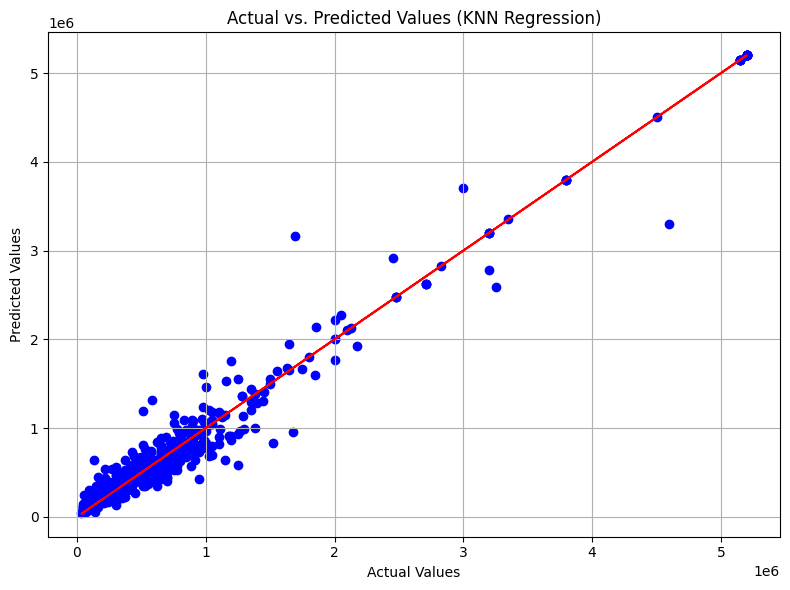

In [162]:
# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_val.values, y_pred, color='blue')
plt.plot(y_val.values, y_val.values, color='red')  # Diagonal line for perfect prediction
plt.title('Actual vs. Predicted Values (KNN Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.tight_layout()
plt.show()

In [160]:
mae = mean_absolute_error(y_val , y_pred)
mse = mean_squared_error(y_val , y_pred)
rmse = np.sqrt(mean_squared_error(y_val , y_pred))
r_squared = r2_score(y_val , y_pred)
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {mse:.4f}')
print(f'R-squared (R²) score: {r_squared:.4f}')

Mean Absolute Error (MAE): 79059.4671
Mean Squared Error (MSE): 21313920629.9886
Root Mean Squared Error (RMSE): 21313920629.9886
R-squared (R²) score: 0.9685


### According to the metrics and plots We get that Using Kneighbors-Regressor technique is better than Linear Regression technique for this Dataset and it`s preprocessing